In [1]:
import os 

# Importing the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import glob # For reading multiple files

In [2]:
image_dir = 'oxford-iiit-pet/images'

In [3]:
# os.listdir(image_dir)

## Pre-Processing:

In [4]:
img_names = [os.path.basename(file) for file in glob.glob(os.path.join(image_dir + '/*.jpg'))]

In [5]:
# img_names

In [6]:
len(img_names)

7390

In [7]:
labels = [' '.join(name.split('_')[:-1:]) for name in img_names]


In [8]:
labels[:5]
unique_labels = set(labels)
# count_unique_labels = len(unique_labels)


In [9]:
unique_labels

{'Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British Shorthair',
 'Egyptian Mau',
 'Maine Coon',
 'Persian',
 'Ragdoll',
 'Russian Blue',
 'Siamese',
 'Sphynx',
 'american bulldog',
 'american pit bull terrier',
 'basset hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english cocker spaniel',
 'english setter',
 'german shorthaired',
 'great pyrenees',
 'havanese',
 'japanese chin',
 'keeshond',
 'leonberger',
 'miniature pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint bernard',
 'samoyed',
 'scottish terrier',
 'shiba inu',
 'staffordshire bull terrier',
 'wheaten terrier',
 'yorkshire terrier'}

In [10]:
lable_exp=[]
for n in img_names:
    lable_exp.append(' '.join( n.split('_')[:-1:]))
    
lable_exp[:5]

['Abyssinian', 'Abyssinian', 'Abyssinian', 'Abyssinian', 'Abyssinian']

In [11]:
def label_encoder(label):
    if label == 'Abyssinian': return 0
    elif label == 'Bengal': return 1
    elif label == 'Birman': return 2
    elif label == 'Bombay': return 3
    elif label == 'British Shorthair': return 4
    elif label == 'Egyptian Mau': return 5
    elif label == 'Persian': return 6
    elif label == 'Ragdoll' : return 7
    elif label == 'Russian Blue' : return 8
    elif label == 'Siamese': return 9
    elif label == 'Sphynx': return 10
    elif label == 'american bulldog': return 11
    elif label == 'american pit bull terrier': return 12
    elif label == 'basset hound': return 13
    elif label == 'beagle': return 14
    elif label == 'boxer': return 15
    elif label == 'chihuahua': return 16
    elif label == 'english cocker spaniel': return 17
    elif label == 'english setter': return 18
    elif label == 'german shorthaired': return 19
    elif label == 'great pyrenees': return 20
    elif label == 'havanese': return 21
    elif label == 'japanese chin': return 22
    elif label == 'keeshond': return 23
    elif label == 'leonberger': return 24
    elif label == 'miniature pinscher': return 25
    elif label == 'newfoundland': return 26
    elif label == 'pomeranian': return 27
    elif label == 'pug': return 28
    elif label == 'saint bernard': return 29
    elif label == 'samoyed': return 30
    elif label == 'scottish terrier': return 31
    elif label == 'shiba inu': return 32
    elif label == 'staffordshire bull terrier': return 33
    elif label == 'wheaten terrier': return 34
    elif label == 'yorkshire terrier': return 35
    else: return 36
    

In [12]:
img_names[45], labels[67]

('Abyssinian_14.jpg', 'Abyssinian')

In [13]:
img_names[245], labels[267]

('american_bulldog_140.jpg', 'american bulldog')

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator, array_to_img, save_img, smart_resize
from tensorflow.keras import layers, models 

In [15]:
features = []
label_list = []  
IMG_SIZE = (224, 224)

for n in img_names:
    label = ' '.join(n.split('_')[:-1:])
    label_encoded = label_encoder(label)
    
    if label_encoded is not None:
        img = load_img(os.path.join(image_dir, n), )
        img = tf.image.resize_with_pad(img_to_array(img, dtype='uint8'), *IMG_SIZE).numpy().astype('uint8')
        image = np.array(img)
        features.append(image)
        label_list.append(label_encoded)  
        

In [16]:
a = pd.Series(label_list).value_counts().sum()

In [17]:
a

7390

In [18]:
features_array = np.array(features)

In [19]:
features_array.shape

(7390, 224, 224, 3)

In [20]:
labels_array = np.array(label_list)

In [21]:
labels_array.shape

(7390,)

In [22]:
label_one_hot = pd.get_dummies(labels_array, dtype='int')

In [23]:
label_one_hot

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7386,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7387,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
from sklearn.model_selection import train_test_split


In [25]:
X_train, X_test, y_train, y_test = train_test_split(features_array, label_one_hot, test_size=0.3)

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, Input, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, RandomFlip, RandomRotation
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as pi 
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam


In [28]:
data_augmentation = Sequential([RandomFlip('horizontal_and_vertical'), RandomRotation(0.2)])
prediction_layer = Dense(37, activation='softmax')

In [29]:
resnet_model = ResNet50(include_top=False, weights='imagenet', pooling='avg')
resnet_model.trainable = False
preprocess_input = pi

In [30]:
inputs = Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = resnet_model(x, training=False)
x = Dropout(0.2)(x)
outputs = prediction_layer(x)
model = Model(inputs, outputs)

In [31]:
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [32]:
X_train.shape, y_train.shape

((3879, 224, 224, 3), (3879, 37))

In [33]:
X_val.shape, y_val.shape

((1294, 224, 224, 3), (1294, 37))

In [34]:
model_history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15)


Epoch 1/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 336s 3s/step - accuracy: 0.2728 - loss: 2.8924 - val_accuracy: 0.8184 - val_loss: 0.6447
Epoch 2/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - accuracy: 0.6869 - loss: 1.0221 - val_accuracy: 0.8594 - val_loss: 0.4840
Epoch 3/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 307s 3s/step - accuracy: 0.7572 - loss: 0.7750 - val_accuracy: 0.8856 - val_loss: 0.3976
Epoch 4/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 342s 3s/step - accuracy: 0.7869 - loss: 0.6690 - val_accuracy: 0.8849 - val_loss: 0.3688
Epoch 5/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 306s 3s/step - accuracy: 0.8096 - loss: 0.5886 - val_accuracy: 0.8980 - val_loss: 0.3448
Epoch 6/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 298s 2s/step - accuracy: 0.8405 - loss: 0.5203 - val_accuracy: 0.8895 - val_loss: 0.3344
Epoch 7/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 309s 3s/step - accuracy: 0.8556 - loss: 0.4484 - val_accuracy: 0.8918 - val_loss: 0.3377
Epoch 8/15
122/122 ━━━━━━━━━━━━━━━━━━━━ 324s 3s/step - accuracy: 0.8473 - loss: 0.4543 - val_accu

In [35]:
y_test = pd.get_dummies(y_test, dtype='int')

model.evaluate(X_test, y_test)


70/70 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.8774 - loss: 0.3889


[0.3788979947566986, 0.8705458045005798]

In [36]:
acc = model_history.history['accuracy']
loss = model_history.history['loss']
val_acc = model_history.history['val_accuracy']
val_loss = model_history.history['val_loss']


In [37]:
epochs = range(1, len(acc) + 1)


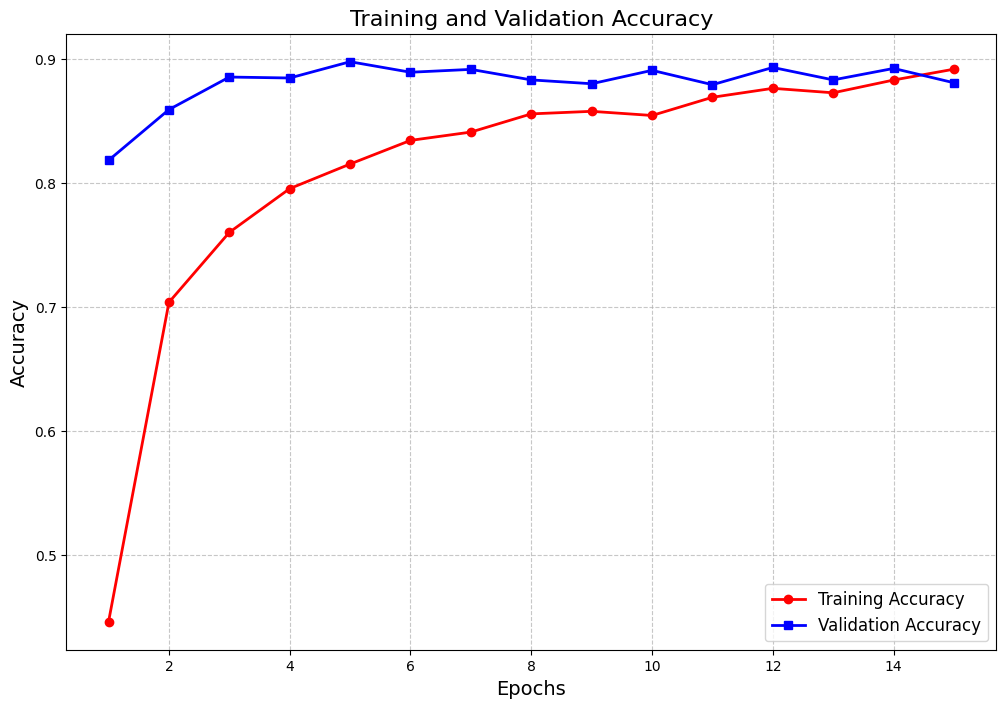

In [38]:
plt.figure(figsize=(12, 8))
plt.plot(epochs, acc, 'r-o', label='Training Accuracy', linewidth=2, markersize=6)
plt.plot(epochs, val_acc, 'b-s', label='Validation Accuracy', linewidth=2, markersize=6)
plt.title('Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()

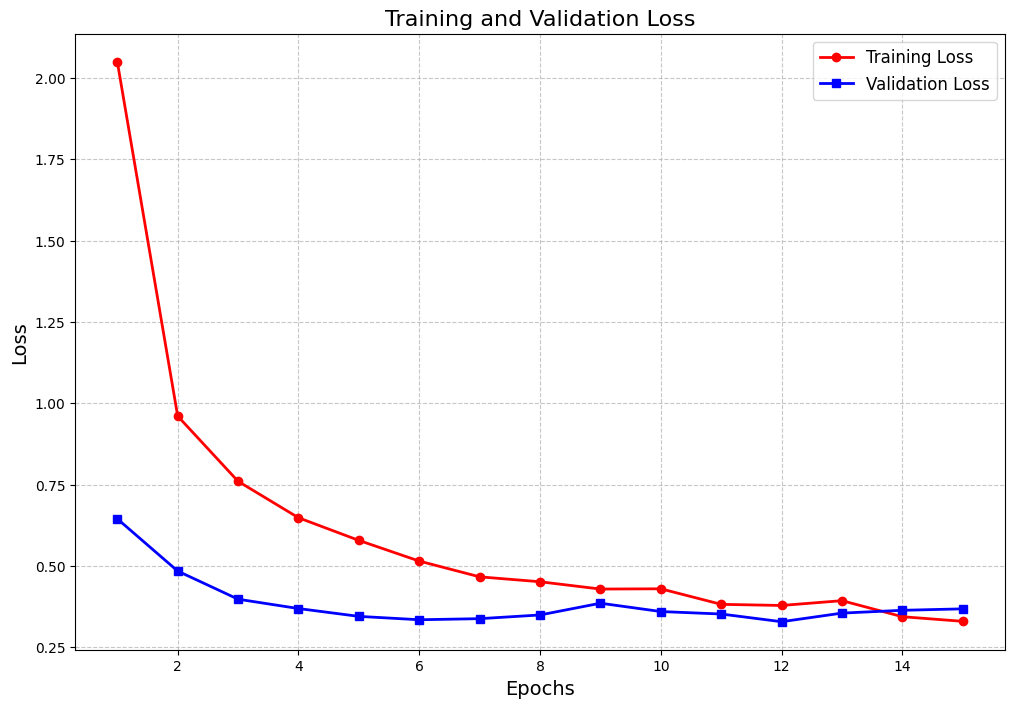

In [39]:
plt.figure(figsize=(12, 8))
plt.plot(epochs, loss, 'r-o', label='Training Loss', linewidth=2, markersize=6)
plt.plot(epochs, val_loss, 'b-s', label='Validation Loss', linewidth=2, markersize=6)
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()

In [40]:
model.evaluate(X_test, y_test)

70/70 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.8774 - loss: 0.3889


[0.3788979947566986, 0.8705458045005798]

In [41]:
y_pred = model.predict(X_test)

70/70 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step


In [42]:

y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(np.array(y_test), axis=1)


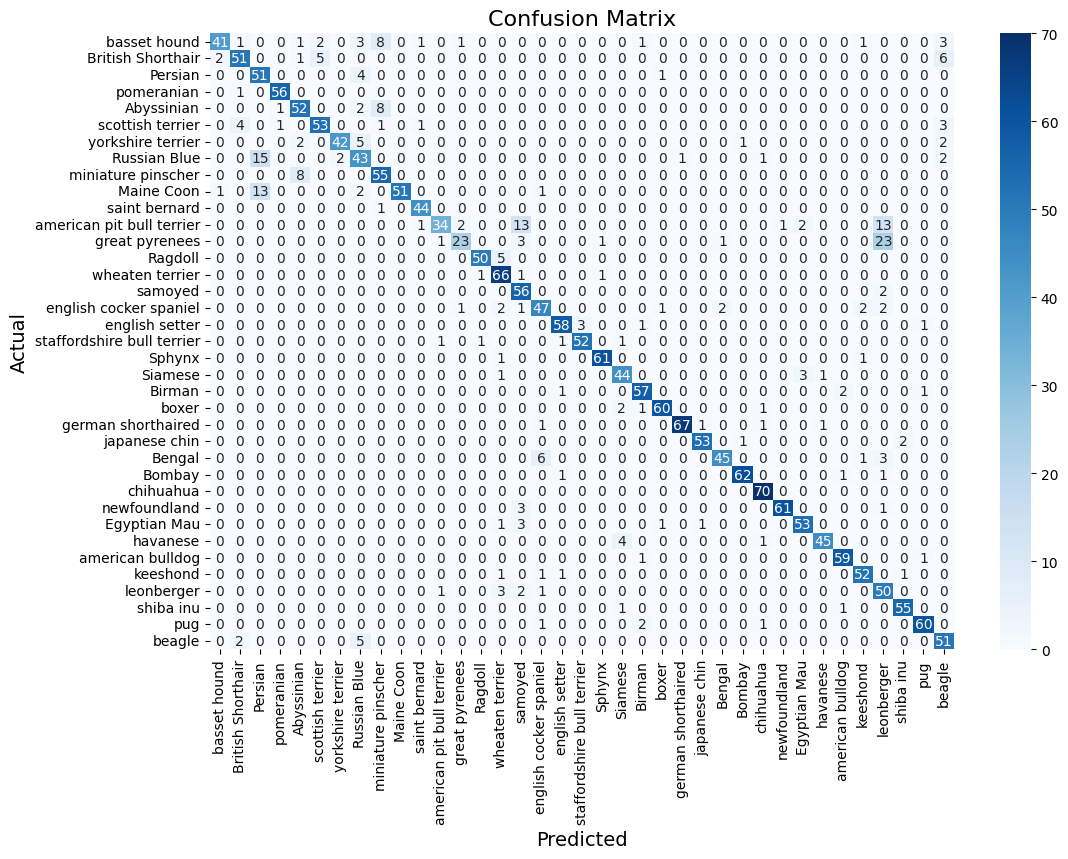

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()


In [44]:
report = classification_report(y_test, y_pred, output_dict=True)


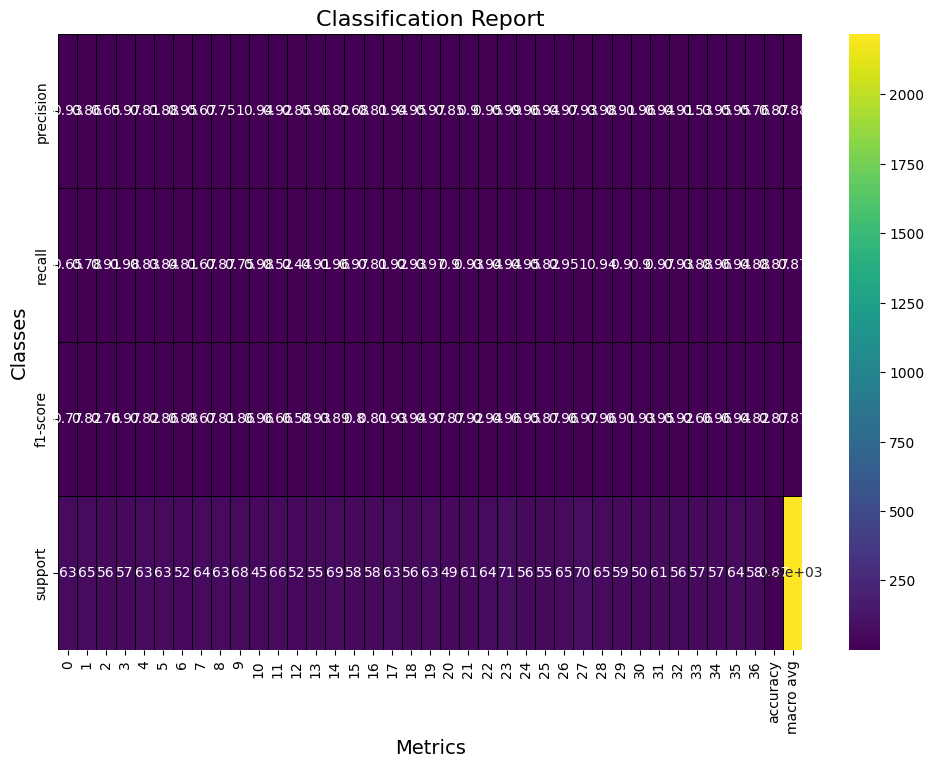

In [45]:
report_df = pd.DataFrame(report).transpose()


plt.figure(figsize=(12, 8))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='viridis', linewidths=0.5, linecolor='black')
plt.title('Classification Report', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Classes', fontsize=14)
plt.show()

In [46]:
def predict_image(image_path):
    img = load_img(image_path)
    img = tf.image.resize_with_pad(img_to_array(img, dtype='uint8'), *IMG_SIZE).numpy().astype('uint8')
    img = np.array(img)
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    prediction = np.argmax(prediction, axis=1)
    return list(unique_labels)[prediction[0]]


In [47]:
a = predict_image('oxford-iiit-pet/images/Abyssinian_1.jpg')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


In [48]:
a

'basset hound'

In [49]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 224, 224,  │          0 │ input_layer_1[0]… │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 224, 224)  │          0 │ sequential[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 224, 224)  │          0 │ sequential[0][0]  │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 224, 224)  │          0 │ sequential[0][0]  │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack (Stack)       │ (None, 224, 224,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 224, 224,  │          0 │ stack[0][0]       │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 2048)      │ 23,587,712 │ add[0][0]         │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 2048)      │          0 │ resnet50[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 37)        │     75,813 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 23,815,153 (90.85 MB)

 Trainable params: 75,813 (296.14 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 151,628 (592.30 KB)

In [51]:
model.input_shape

(None, 224, 224, 3)

In [53]:
model.output_shape

(None, 37)

In [62]:
# Assuming `model` is your trained Keras model
model.save('model.keras')

Yes, saving your model with a .keras extension is perfectly fine. This is a file format used by Keras to save models. It includes both the architecture and the weights of the model, which makes it easy to reload and use later.

In [73]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np


In [109]:

# Load the saved model
model = load_model('model.keras')


In [110]:

# Function to preprocess the image
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255
    return img_array


In [111]:

# Function to classify the image
def classify_image(img_path):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=1)
    return predicted_class_index




In [114]:
# Example usage
img_path = 'oxford-iiit-pet/images/Russian_Blue_61.jpg'  # Use forward slashes or escape backslashes
predicted_class_label = classify_image(img_path)
print(f'The predicted class is: {predicted_class_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
The predicted class is: [3]
